In [18]:
# Cross Validation and Nested CV for IRIS dataset
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over for SVM
# NOTE This creates a new model for each iteration
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial (each trial represetns the random state)
for i in range(NUM_TRIALS):
    # choose cross-validation tecniques for the inner/outer loops
    # independently of the dataset
    # NOTE1: the random state changes thus giving us different sets of random numbers each time
    # NOTE2: Will use Stratified K-fold CV to ensure balance of data in splits
    
    # K-fold Nested CV
#     inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
#     outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Stratified K-fold Nested CV
    inner_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=i)
    
    # Non-nested param search and scoring
    # NOTE: This acts the same as feeding the value 5 to the GridSearch
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, iid=False)
    clf.fit(X_iris, y_iris)
    non_best_score = clf.best_score_
    non_best_params = clf.best_params_
    non_nested_scores[i] = non_best_score
    
    print("Trial number = " + str(i))
    print("Non nested CV Best Score = " + str(non_best_score))
    print("Non nested CV Best params = " + str(non_best_params))

    
    # Nested cv with parameter optimization (tunes the hyper params for the current model)
    # NOTE: Can use cross_validate() function instead in order to see test,train scores from CV operations
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    print("Nested CV Scores = " + str(nested_score))
    print("Nested CV Mean score = " + str(nested_scores[i]))
    print("\n")
    
score_diff = non_nested_scores - nested_scores
print("Score Difference (Non-Nested vs Nested):")
print(str(score_diff))
print("\n")

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_diff.mean(), score_diff.std()))
    

Trial number = 0
Non nested CV Best Score = 0.9802350427350427
Non nested CV Best params = {'C': 10, 'gamma': 0.1}
Nested CV Scores = [0.97435897 0.97435897 0.97222222 1.        ]
Nested CV Mean score = 0.9802350427350427


Trial number = 1
Non nested CV Best Score = 0.9802350427350427
Non nested CV Best params = {'C': 100, 'gamma': 0.01}
Nested CV Scores = [0.97435897 0.97435897 0.97222222 1.        ]
Nested CV Mean score = 0.9802350427350427


Trial number = 2
Non nested CV Best Score = 0.9802350427350428
Non nested CV Best params = {'C': 10, 'gamma': 0.01}
Nested CV Scores = [0.94871795 1.         1.         0.97222222]
Nested CV Mean score = 0.9802350427350428


Trial number = 3
Non nested CV Best Score = 0.9732905982905983
Non nested CV Best params = {'C': 10, 'gamma': 0.1}
Nested CV Scores = [0.97435897 0.94871795 0.97222222 0.94444444]
Nested CV Mean score = 0.9599358974358974


Trial number = 4
Non nested CV Best Score = 0.9599358974358975
Non nested CV Best params = {'C': 1, '

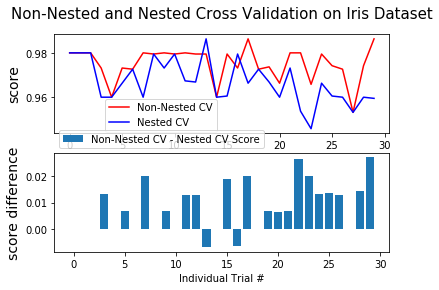

In [19]:

# Plot the scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line = plt.plot(non_nested_scores, color='r')
nested_line = plt.plot(nested_scores, color='b')
plt.ylabel('score', fontsize='14')
plt.legend(["Non-Nested CV", "Nested CV"],
          bbox_to_anchor=(0, 0.4, 0.5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference over each trial
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_diff)
plt.xlabel("Individual Trial #")
plt.legend(["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()